#  yash Sanghani Internship Task 2 [ 27/05/2021]

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob


In [4]:
df = pd.read_csv(r"D:\data tgraining\AllProductReviews.csv")

In [5]:
df.shape

(14337, 4)

In [6]:
df.columns

Index(['ReviewTitle', 'ReviewBody', 'ReviewStar', 'Product'], dtype='object')

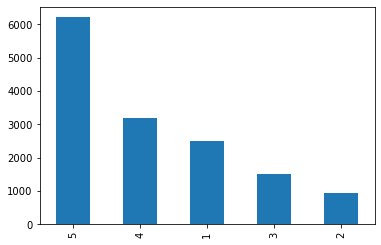

In [10]:
df.ReviewStar.value_counts().plot(kind='bar')

In [11]:
df['ReviewBody'] = df['ReviewBody'].astype(str)
df['ReviewBody'][2]

'i bought itfor 999,I purchased it second time, gifted first one to brother. This is really good.Sound quality is really good.You can connect 2 devices at a time.I connect laptop and mobile both.when listening muaic on Lappy, if u get a call, it switches to mobile,this switch between device is not good but again in this price its awesome.Battery stand by is 36 hours for me, and i have used it continously for 8 hours in one go. So Battery life is pretty awesome.Comfortable on ear.\n'

In [12]:
df['ReviewBody'] = df['ReviewBody'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['ReviewBody'][2]

'i bought itfor 999,i purchased it second time, gifted first one to brother. this is really good.sound quality is really good.you can connect 2 devices at a time.i connect laptop and mobile both.when listening muaic on lappy, if u get a call, it switches to mobile,this switch between device is not good but again in this price its awesome.battery stand by is 36 hours for me, and i have used it continously for 8 hours in one go. so battery life is pretty awesome.comfortable on ear.'

In [14]:
df['ReviewBody'] = df['ReviewBody'].str.replace('[^\w\s]','')
df['ReviewBody'][2]

'i bought itfor 999i purchased it second time gifted first one to brother this is really goodsound quality is really goodyou can connect 2 devices at a timei connect laptop and mobile bothwhen listening muaic on lappy if u get a call it switches to mobilethis switch between device is not good but again in this price its awesomebattery stand by is 36 hours for me and i have used it continously for 8 hours in one go so battery life is pretty awesomecomfortable on ear'

In [24]:
stop = stopwords.words('english')
df['ReviewBody'] = df['ReviewBody'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['ReviewBody'][2]

'bought itfor 999i purchased second time gifted first one brother really goodsound quality really goodyou connect 2 devices timei connect laptop mobile bothwhen listening muaic lappy u get call switches mobilethis switch device good price awesomebattery stand 36 hours used continously 8 hours one go battery life pretty awesomecomfortable ear'

In [25]:
st = PorterStemmer()
df['ReviewBody'] = df['ReviewBody'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df['ReviewBody'][2]

'bought itfor 999i purchas second time gift first one brother realli goodsound qualiti realli goodyou connect 2 devic timei connect laptop mobil bothwhen listen muaic lappi u get call switch mobilethi switch devic good price awesomebatteri stand 36 hour use contin 8 hour one go batteri life pretti awesomecomfort ear'

In [27]:
def senti(x):
    return TextBlob(x).sentiment  
 
df['senti_score'] = df['ReviewBody'].apply(senti)
 
df.senti_score

0        (0.06750000000000003, 0.5391666666666667)
1          (0.405952380952381, 0.5226190476190476)
2        (0.31666666666666665, 0.3111111111111111)
3                                      (0.55, 0.5)
4        (0.10000000000000005, 0.5533333333333333)
                           ...                    
14332                    (0.7, 0.6000000000000001)
14333                                   (0.0, 0.0)
14334                                   (0.4, 0.4)
14335                  (0.49000000000000005, 0.52)
14336                                  (0.0, 0.75)
Name: senti_score, Length: 14337, dtype: object

In [30]:
from collections import Counter
import nltk
text = " coursera is one of the best sites to learn WEB, SAP, Ethical Hacking and much more online."
lower_case = text.lower()
tokens = nltk.word_tokenize(lower_case)
tags = nltk.pos_tag(tokens)
counts = Counter( tag for word,  tag in tags)
print(counts)

Counter({'NN': 5, ',': 2, 'VBZ': 1, 'CD': 1, 'IN': 1, 'DT': 1, 'JJS': 1, 'NNS': 1, 'TO': 1, 'VB': 1, 'JJ': 1, 'CC': 1, 'RB': 1, 'JJR': 1, '.': 1})


 : 84
,: 3
.: 4
A: 1
F: 3
a: 27
b: 10
c: 25
d: 16
e: 59
f: 14
g: 4
h: 9
i: 27
l: 9
m: 21
n: 36
o: 32
p: 10
q: 5
r: 34
s: 18
t: 33
u: 24
v: 1
w: 1
x: 4
y: 10


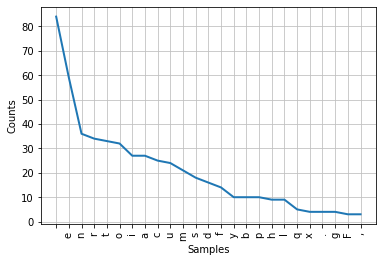

In [38]:

import nltk
from nltk.corpus import webtext
from nltk.probability import FreqDist
 

wt_words = "A frequency distribution records the number of times each outcome of an experiment has occurred. For example, a frequency distribution could be used to record the frequency of each word type in a document. Formally, a frequency distribution can be defined as a function mapping from each sample to the number of times that sample occurred as an outcome.Frequency distributions are generally constructed by running a number of experiments, and incrementing the count for a sample every time it is an outcome of an experiment."
data_analysis = nltk.FreqDist(wt_words)
 
# Let's take the specific words only if their frequency is greater than 3.
filter_words = dict([(m, n) for m, n in data_analysis.items()])
 
for key in sorted(filter_words):
    print("%s: %s" % (key, filter_words[key]))
 
data_analysis = nltk.FreqDist(filter_words)
 
data_analysis.plot(25, cumulative=False)

In [49]:
import re
phonenumber=input("Enter phonr number with - :")

regex= "\w{3}-\w{3}-\w{4}"
if re.search(regex, phonenumber):
        print("Valid phone number")
else:
        print("Invalid phone number")


Enter phonr number with - :125-4544-5555
Invalid phone number


In [52]:
import re
email = input("Enter your Mail Id:")
regex= "^[a-zA-Z0-9+_.-]+@[a-zA-Z0-9.-]+$"
if re.search(regex,email):
    print("Valid Email Id")
else:
    print("Invalid Email Id")

Enter your Mail Id:jay@.com
Valid Email Id
